# <span style= "color :red"> 순환신경망 </span>
- 여러개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법
- 장점 : 입력과 출력을 설정하는 방법에 따라 다수/단일입력 다수/단일출력의 결과에 사용이 가능함

### <span style= "color :red"> reuter 뉴스 실습 </span>


In [13]:
from tensorflow.keras.datasets import reuters
import numpy as np 

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인 
print("총 카테고리 : ",np.max(y_train) + 1)
print(x_train.shape, y_train.shape)         # 학습데이터
print(x_test.shape, y_test.shape)           # 테스트데이터
print(x_train[0])


총 카테고리 :  46
(8982,) (8982,)
(2246,) (2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


- 길이 맞춰주기

In [14]:
from tensorflow.keras.preprocessing import sequence

# 단어의 수를 맞춰줌
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

print(x_train.shape, x_test.shape)

(8982, 100) (2246, 100)


- 원핫인코딩을 처리 

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)


(8982, 46) (2246, 46)


- 딥러닝 모델을 설정

In [15]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 10))
model.add(keras.layers.LSTM(100, activation = "tanh"))
model.add(keras.layers.Dense(46, activation = "softmax"))

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics= "accuracy")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 10)          10000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dense_1 (Dense)             (None, 46)                4646      
                                                                 
Total params: 59,046
Trainable params: 59,046
Non-trainable params: 0
_________________________________________________________________


In [16]:
er_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_test, y_test),  callbacks=er_stop)


Epoch 1/200
450/450 [==============================] - 10s 20ms/step - loss: 2.4245 - accuracy: 0.3606 - val_loss: 2.1553 - val_accuracy: 0.4782
Epoch 2/200
450/450 [==============================] - 8s 19ms/step - loss: 1.9982 - accuracy: 0.4899 - val_loss: 1.8542 - val_accuracy: 0.5303
Epoch 3/200
450/450 [==============================] - 9s 19ms/step - loss: 1.8753 - accuracy: 0.5237 - val_loss: 1.8393 - val_accuracy: 0.5441
Epoch 4/200
450/450 [==============================] - 9s 19ms/step - loss: 1.8537 - accuracy: 0.5292 - val_loss: 2.3818 - val_accuracy: 0.4541
Epoch 5/200
450/450 [==============================] - 9s 19ms/step - loss: 2.1376 - accuracy: 0.4585 - val_loss: 1.9064 - val_accuracy: 0.5191
Epoch 6/200
450/450 [==============================] - 8s 19ms/step - loss: 1.8013 - accuracy: 0.5305 - val_loss: 1.7763 - val_accuracy: 0.5481
Epoch 7/200
450/450 [==============================] - 9s 19ms/step - loss: 1.7205 - accuracy: 0.5410 - val_loss: 1.7485 - val_accuracy

- 모델 테스트 평가 및 모델 성능 시각화

71/71 [==============================] - 1s 7ms/step - loss: 1.2018 - accuracy: 0.6901
모델 정확도 :  0.690115749835968


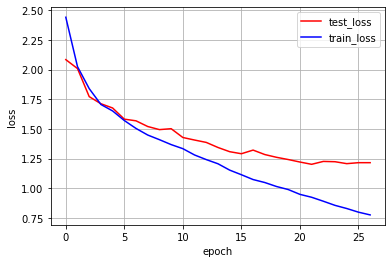

In [12]:
print("모델 정확도 : ",model.evaluate(x_test, y_test)[1])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

import matplotlib.pyplot as plt
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, c="red", label = "test_loss")
plt.plot(x_len, y_loss, c="blue", label = "train_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

### <span style= "color :red"> imdb 영화 리뷰 분류하기 </span>


In [23]:
from tensorflow import keras

# 데이터 호출 
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=5000)
print(x_train.shape, x_test.shape)


# 데이터 길이 설정 
from tensorflow.keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)
print(x_train.shape, x_test.shape)

(25000,) (25000,)
(25000, 500) (25000, 500)


- 모델 구조 설계

In [24]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(5000,100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64,5, padding="valid", activation = "relu"))
model.add(keras.layers.MaxPool1D(4))
model.add(keras.layers.LSTM(55))
model.add(keras.layers.Dense(1, activation ="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                      

Epoch 1/100
469/469 [==============================] - 27s 54ms/step - loss: 0.4176 - accuracy: 0.7902 - val_loss: 0.2903 - val_accuracy: 0.8800
Epoch 2/100
469/469 [==============================] - 26s 55ms/step - loss: 0.2400 - accuracy: 0.9051 - val_loss: 0.2568 - val_accuracy: 0.8938
Epoch 3/100
469/469 [==============================] - 25s 54ms/step - loss: 0.1842 - accuracy: 0.9301 - val_loss: 0.2691 - val_accuracy: 0.8878
Epoch 4/100
469/469 [==============================] - 25s 54ms/step - loss: 0.1444 - accuracy: 0.9479 - val_loss: 0.3583 - val_accuracy: 0.8779
Epoch 5/100
469/469 [==============================] - 26s 55ms/step - loss: 0.1147 - accuracy: 0.9593 - val_loss: 0.3653 - val_accuracy: 0.8800
Epoch 6/100
469/469 [==============================] - 25s 54ms/step - loss: 0.0913 - accuracy: 0.9695 - val_loss: 0.3715 - val_accuracy: 0.8803
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.2721 - accuracy: 0.8873
모델 정확도 :  0.8872799873352051

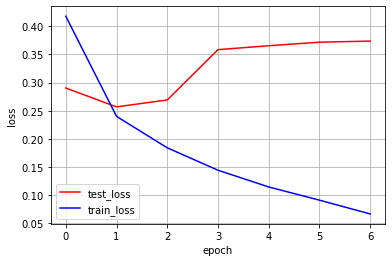

In [25]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics="accuracy")
er_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_split=.25, callbacks=er_stop)

print("모델 정확도 : ",model.evaluate(x_test, y_test)[1])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

import matplotlib.pyplot as plt
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, c="red", label = "test_loss")
plt.plot(x_len, y_loss, c="blue", label = "train_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()